# Obesity Levels 

### Our Motivation 
The "Obesity Levels" dataset has captured our interest because obesity is a major public health issue with significant consequences. By examining this dataset, we hope to uncover the key factors contributing to obesity and leverage machine learning models to enhance our ability to classify and predict obesity levels. Understanding these factors will empower individuals and healthcare professionals to create more effective prevention strategies, ultimately reducing obesity rates and improving public health outcomes. 

### Our Goal 
Our goal is to create a machine-learning model that predicts individual obesity levels using both classification and clustering techniques. The classification approach will enable us to train the model to differentiate between individuals with different obesity levels based on a variety of health, dietary, and lifestyle factors. Clustering, on the other hand, will help identify hidden patterns in the dataset by grouping individuals with similar obesity risk profiles. These clusters will then assist in predicting obesity levels for new individuals by analyzing their resemblance to existing groups.

In [97]:
import pandas as pd
df = pd.read_csv('Dataset/Orignal_dataset.csv')
filtered_df =pd.read_csv('Dataset/Orignal_dataset.csv')

##### source of dataset : https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

#### General Information About The Dataset
- Dataset include 17 attributes and 2111 records.
- There is 8 attributes of type float and the other 9 of type object. 
- Class label : NObeyesdad ( type of obesity ).
- There are no missing values.

#### Clarifying Attributes' Shortcuts
- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
-  CAEC : Feature, Categorical, " Do you eat any food between meals? "
-  CH2O: Feature, Continuous, " How much water do you drink daily? "
-  SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
-  FAF: Feature, Continuous, " How often do you have physical activity? "
-  TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
-  CALC : Feature, Categorical, " How often do you drink alcohol? "
-  MTRANS : Feature, Categorical, " Which transportation do you usually use? "
-  NObeyesdad : Target, Categorical, "Obesity level"


## Data Summarization


In [99]:
import seaborn as sns 
import matplotlib.pyplot as plt

### Sample data 

 Here we selected a random sample of 100 rows from the obesity dataset to gain insights into the data .


In [100]:
sample_df = df.sample(n=100, random_state=42) 
sample_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
544,20.406871,Female,1.755978,53.699561,no,yes,2.000000,3.891994,no,no,1.863930,yes,2.870127,2.000000,Frequently,Public_Transportation,Insufficient_Weight
1987,26.000000,Female,1.624950,111.004920,Sometimes,yes,3.000000,3.000000,no,no,2.704315,yes,0.000000,0.322666,Sometimes,Public_Transportation,Obesity_Type_III
420,18.000000,Male,1.850000,60.000000,Sometimes,yes,3.000000,4.000000,yes,no,2.000000,yes,2.000000,0.000000,Sometimes,Automobile,Insufficient_Weight
527,21.000000,Female,1.520000,42.000000,Sometimes,yes,3.000000,1.000000,no,no,1.000000,no,0.000000,0.000000,Frequently,Public_Transportation,Insufficient_Weight
196,22.000000,Male,1.750000,74.000000,Sometimes,no,2.000000,3.000000,no,no,2.000000,yes,1.000000,2.000000,Sometimes,Bike,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,17.908114,Male,1.793926,59.682591,no,yes,2.568063,4.000000,no,no,2.000000,yes,2.000000,0.220029,Sometimes,Automobile,Insufficient_Weight
299,23.000000,Male,1.700000,75.000000,Sometimes,yes,3.000000,3.000000,no,no,3.000000,no,1.000000,2.000000,Sometimes,Public_Transportation,Overweight_Level_I
109,21.000000,Female,1.650000,88.000000,no,yes,3.000000,1.000000,no,no,3.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_I
298,18.000000,Male,1.800000,80.000000,Frequently,yes,2.000000,3.000000,no,no,1.000000,yes,0.000000,1.000000,Frequently,Public_Transportation,Normal_Weight


### Histogram

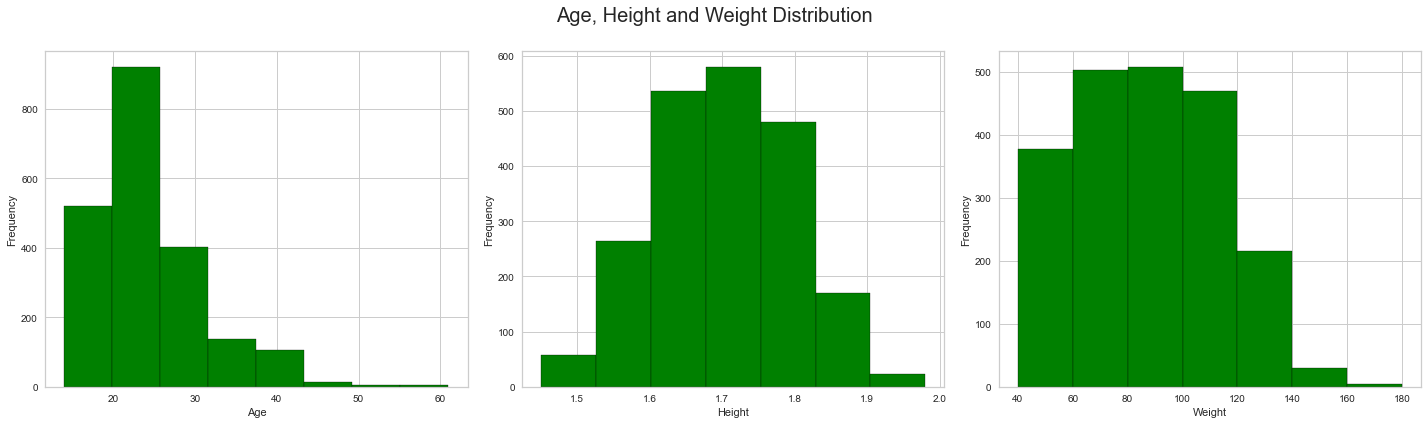

In [101]:
#subplot includes histograms of Age, Height and Weight
plt.figure(figsize=(20,6))
plt.suptitle('Age, Height and Weight Distribution', fontsize=20)

#first chart
plt.subplot(1,3,1)
df["Age"].hist(color='green' ,bins=8 ,edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")

#second chart
plt.subplot(1,3,2)
df["Height"].hist(color='green' ,bins=7,edgecolor='black')
plt.xlabel("Height")
plt.ylabel("Frequency")

#third chart
plt.subplot(1,3,3)
Weight_bins=[40, 60,80,100,120,140,160,180]
df["Weight"].hist(color='green' , bins=Weight_bins,edgecolor='black')
plt.xticks(Weight_bins)
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

#### Summery of Graphs
Histograms are a powerful tool for visualizing the distribution of continuous numerical data. With the most important continuous variables in our dataset, Age, Height, and Weight.

##### 1. Age Histogram (Leftmost Plot):
- <b>Shape:</b>  The distribution is right-skewed (positively skewed).
- <b>Peak:</b> The highest frequency of individuals falls within the 20 to 25 age range.
- <b>Spread:</b> This shows that the population is largely concentrated among younger individuals, especially in their 20s and 30s.

##### 2. Height Histogram (Middle Plot):
- <b>Shape:</b> The distribution appears close to normal (bell-shaped).
- <b>Peak:</b> The most frequent height is around 1.7 meters.
- <b>Spread:</b> The heights generally range between 1.60 meters and 1.82 meters, with less individuals below or above this range.
- <b>Observation:</b> The height distribution is centered around an average height, with a symmetrical spread on both sides, indicating a typical height distribution for a population.

##### 3. Weight Histogram (Rightmost Plot):
- <b>Shape:</b> The weight distribution is slightly skewed to the right.
- <b>Peak:</b> The most frequent weights are between 60 and 120 kg.
- <b>Spread:</b> The majority of individuals weigh between 40 and 140 kg, with a significant drop in frequency for weights above 140 kg.

### Heat Map 

Text(0.5, 1.0, 'Correlation heatmap')

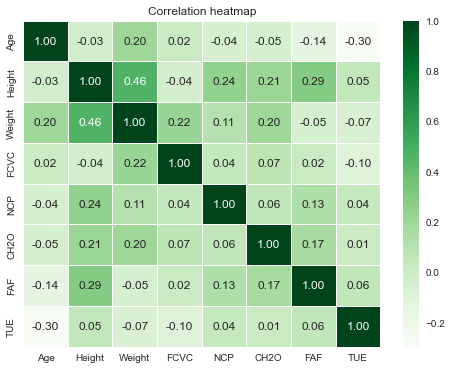

In [102]:
selected_columns = df [['Age' , 'Height' , 'Weight' , 'FCVC' , 'NCP' , 'CH2O' , 'FAF' , 'TUE']]
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True , cmap='Greens',fmt=".2f",linewidths=.5)
plt.title('Correlation heatmap')

The heatmap provides a quick visual summary of relationships, helping us identify highly correlated variables, either positively or negatively .
#### Correlation meanings :
- if the number is close to 1 , that means it has a Positive Strong Correlation
- if the number is between 0.3 and 0.7 , that means it has Moderate Correlation
- if the number is close to zero , that means it has Weak or No Correlation
- if the number is close to -1 , that means it has a Negative Strong Correlation

Most of our attributes has no correlation since they are mostly close to zero , and few has a Moderate Correlation such as ( weight and height ) there is a noticeable but not exceptionally strong linear relationship between a person's height and their weight .

### chi-square

In [103]:
from scipy.stats import chi2_contingency


# Define the columns to compare
col1 = 'family_history_with_overweight'
col2 = 'CAEC'

# Create a contingency table for the two columns
contingency_table = pd.crosstab(df[col1], df[col2])

print(f"\nContingency Table for {col1} and {col2}:")
print(contingency_table)

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"\nChi-Square Statistic for {col1} and {col2}: {chi2_stat}")
print(f"P-Value for {col1} and {col2}: {p_value}")
print(f"Degrees of Freedom for {col1} and {col2}: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the result
if p_value < 0.05:
    conclusion = "There is a significant association between family history of overweight and CAEC."
else:
    conclusion = "There is no significant association between family history of overweight and CAEC."

print(f"\nConclusion: {conclusion}")



Contingency Table for family_history_with_overweight and CAEC:
CAEC                            Always  Frequently  Sometimes  no
family_history_with_overweight                                   
no                                  19         114        219  33
yes                                 34         128       1546  18

Chi-Square Statistic for family_history_with_overweight and CAEC: 260.36443035979585
P-Value for family_history_with_overweight and CAEC: 3.7494858053242665e-56
Degrees of Freedom for family_history_with_overweight and CAEC: 3
Expected Frequencies:
[[   9.66603505   44.13548081  321.89720512    9.30127901]
 [  43.33396495  197.86451919 1443.10279488   41.69872099]]

Conclusion: There is a significant association between family history of overweight and CAEC.


we applied chi-square for some of our nominal attributes to check the correlation between them and visualize them since heat map only accept numeric values , so we chose Family history with overweight and CAEC ( Do you eat any food between meals ? )

### Missing Values

In [104]:
missing_values=df.isna().sum()
print('\033[1mMissing Values in each column:\033[0m')  
print(missing_values,'\n')
print('\033[1mTotal Number of Missing Values in Dataset:\033[0m')
print(missing_values.sum())
   

Missing Values in each column:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64 

Total Number of Missing Values in Dataset:
0


### Bar Chart

<function matplotlib.pyplot.show(close=None, block=None)>

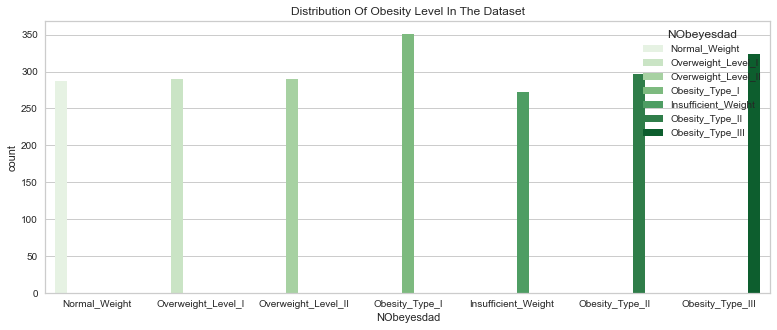

In [105]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

We choose a bar chart because it is ideal for displaying this type of information because it visually represents the categorical distribution of data, allowing us to easily compare the frequency of each obesity level. It clearly shows differences in count across categories, making it simple to identify patterns, such as which obesity levels are most or least common, as well as categories with similar representation. The bar chart's straightforward layout makes it an effective tool for presenting discrete, non-continuous data like obesity levels, where each category is distinct and counts are important for analysis.

The dataset shows a diverse distribution across obesity categories, with the largest group in the (Obesity_Type_I) category.A substantial number of individuals also fall under Normal_Weight, Overweight_Level_I, and Overweight Level_II.

(Insufficient_Weight )is the least represented category, indicating fewer individuals fall under this category. This information can help in understanding the weight distribution and in further analysis related to health outcomes or associated risk factors.

### Box Plot 

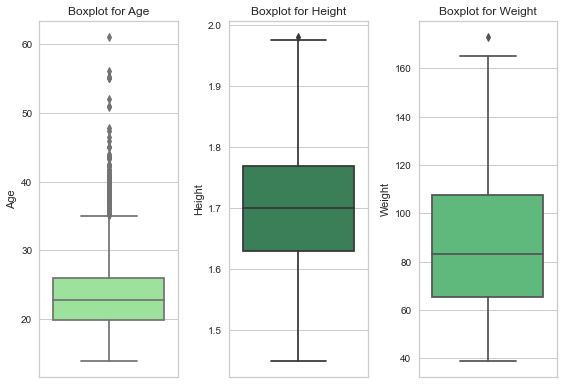

In [106]:
fig, axes = plt.subplots(1,3,)
sns.boxplot(data=df,y='Age' , ax=axes[0],color='#90EE90')
axes[0].set_title("Boxplot for Age")
sns.boxplot(data=df,y='Height' , ax=axes[1],color='#2E8B57')
axes[1].set_title("Boxplot for Height")
sns.boxplot(data=df,y='Weight' , ax=axes[2],color='#50C878')
axes[2].set_title("Boxplot for Weight")
plt.tight_layout()
plt.show();


The figure contains three boxplots side by side, each representing different variables:

1. **Boxplot for Age**:
   - This plot depicts the distribution of "Age."
   - The median age appears to be around **22 years**.
   - There are several outliers above **35**, indicated by the dots above the upper whisker.
   - The interquartile range (IQR) stretches roughly from **22 to 30**.

2. **Boxplot for Height**:
   - This plot represents the "Height" variable.
   - The median height seems to be about **1.7 meters**.
   - There are a few outliers around **2.0 meters**.
   - The IQR lies between approximately **1.6 and 1.8 meters**.

3. **Boxplot for Weight**:
   - This plot shows the distribution of "Weight."
   - The median weight looks close to **80 kg**.
   - One outlier exists at around **170 kg**.
   - The IQR ranges between **60 and 100 kg**.

These boxplots provide a summary of the data distribution for age, height, and weight, illustrating central tendency (median), spread (IQR), and outliers that we could consider removing later.


### Pie Chart

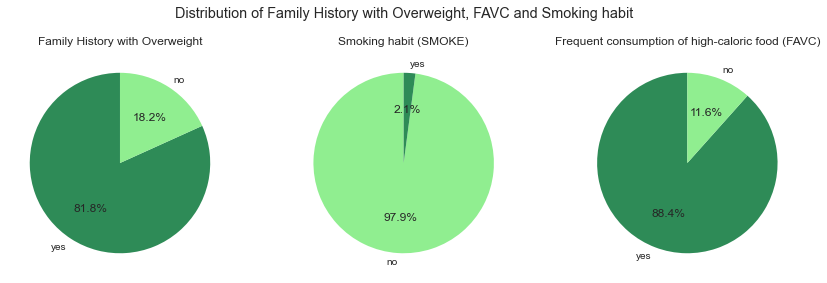

In [107]:
plt.figure(figsize=(12, 4))
plt.suptitle('Distribution of Family History with Overweight, FAVC and Smoking habit')

plt.subplot(1,3,1)
family_history_values = df['family_history_with_overweight'].value_counts()
plt.pie(family_history_values, labels=family_history_values.index, autopct='%1.1f%%', startangle=90, colors=['#2E8B57','#90EE90'])
plt.title('Family History with Overweight')

plt.subplot(1,3,2)
smoke_values = df['SMOKE'].value_counts()
plt.pie(smoke_values, labels=smoke_values.index, autopct='%1.1f%%', startangle=90, colors=['#90EE90','#2E8B57'])
plt.title('Smoking habit (SMOKE)')

plt.subplot(1,3,3)
favc_values = df['FAVC'].value_counts()
plt.pie(favc_values, labels=favc_values.index, autopct='%1.1f%%', startangle=90, colors=['#2E8B57','#90EE90'])
plt.title('Frequent consumption of high-caloric food (FAVC)')

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

#### FAVC (Frequent Consumption of High-Caloric Food)
This pie chart displays the percentage of individuals who frequently consume high-caloric foo . Based on the chart, 88.4% of respondents answered “yes,” highlighting a notable presence of unhealthy eating habits, which is a significant factor in obesity. Meanwhile, the remaining 11.6% who answered “no” demonstrate healthier dietary habits among this group of individuals.

#### SMOKE (Smoking habit)
This pie chart displays the percentage of individuals who smoke or not. 97.9% of the responses were ‘no,’ while only 2.1% answered ‘yes.’ This indicates that most individuals in the dataset don’t smoke, which suggests they face fewer health risks related to smoking, such as obesity. Since the majority of people here don’t smoke, it likely means that smoking isn’t a major contributing factor to obesity in this group.

#### Family History With Overweight
This pie chart displays percentage of individuals with family history with overweight. 81.8% of individuals answered ‘yes,’ indicating that genetic or familial factors, such as family history, are associated with an increased risk of being overweight or obese due to both genetic and shared lifestyle factors.

### Describe Function 


In [108]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Here we have summary statistics for our numerical columns such as Height, Weight, and others. While we have previously visualized some of these measures using box plots (for central tendencies and spread) and histograms (for distributions), the describe() function gathers these key statistics in a more precise, tabular form.

## Data Preprocessing

### Balancing our dataset 

In [109]:
# maps obesity levels (class label )in the dataset from 7 classes to 4 for easier analysis.
label_mapping = {
    'Insufficient_Weight': 'Insufficient_Weight',
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obesity',
    'Obesity_Type_II': 'Obesity',
    'Obesity_Type_III': 'Obesity'
}

df['NObeyesdad'] = df['NObeyesdad'].map(label_mapping)

#### Bar chart after Mapping 

<function matplotlib.pyplot.show(close=None, block=None)>

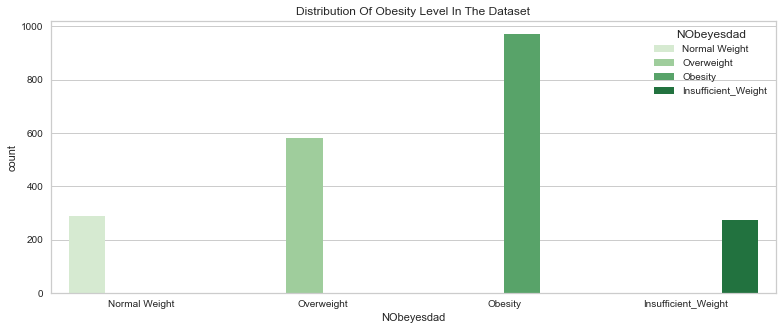

In [110]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

In [111]:
from sklearn.utils import resample
print("Original distribution:")
print(df['NObeyesdad'].value_counts())
class_proportions = df['NObeyesdad'].value_counts(normalize=True)
print(class_proportions)

downsample_ratio = 0.55 # 50% of the original size for Obesity and Overweight

# Create a DataFrame to store the balanced data
balanced_df = pd.DataFrame()

# Apply undersampling for Obesity and Overweight and keep Insufficient_Weight and Normal Weight unchanged 
for label in df['NObeyesdad'].unique():
    df_label = df[df['NObeyesdad'] == label]
    
    if label in ['Obesity', 'Overweight']:
        # Downsample Obesity and Overweight to 50% of their original size
        target_samples = int(len(df_label) * downsample_ratio)
        df_label_resampled = resample(df_label, replace=False, n_samples=target_samples, random_state=30)
    else:
        # keep Insufficient_Weight and Normal Weight unchanged 
        df_label_resampled = df_label
    
    # Append the resampled or unchanged data to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, df_label_resampled])

   # Shuffle the resulting balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print("\nBalanced distribution:")
print(balanced_df['NObeyesdad'].value_counts())

class_proportions = balanced_df['NObeyesdad'].value_counts(normalize=True)
print(class_proportions)

Original distribution:
Obesity                972
Overweight             580
Normal Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64
Obesity                0.460445
Overweight             0.274751
Normal Weight          0.135955
Insufficient_Weight    0.128849
Name: NObeyesdad, dtype: float64

Balanced distribution:
Obesity                534
Overweight             319
Normal Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64
Obesity                0.378187
Overweight             0.225921
Normal Weight          0.203258
Insufficient_Weight    0.192635
Name: NObeyesdad, dtype: float64


#### Evaluating and Achieving Dataset Balance

We define a dataset as Balanced when the ratio between the largest and smallest class proportions is close to 2:1. Conversely, a dataset is considered Imbalanced if this ratio exceeds 2:1 significantly.

In our original dataset, the class proportions were as follows:

Largest class proportion: 0.460445
Smallest class proportion: 0.128849
Calculating the ratio:

Ratio = 0.460445 / 0.128849 ≈ 3.58

Since this ratio is greater than 2, we determined that our dataset was imbalanced.

After applying techniques to balance the dataset, the updated class proportions are:

Largest class proportion: 0.378187
Smallest class proportion: 0.192635
Calculating the new ratio:

New Ratio = 0.378187 / 0.192635 ≈ 1.96

With this new ratio being less than 2, we have successfully balanced our dataset.

#### Bar chart after balancing our dataset  

<function matplotlib.pyplot.show(close=None, block=None)>

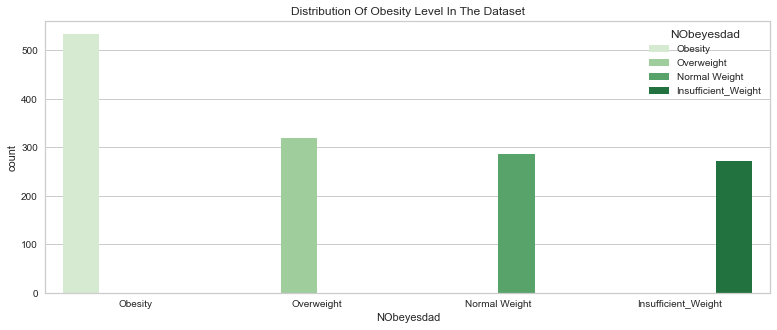

In [112]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = balanced_df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

### Removing outliers

In [113]:
AgeQ1 = df['Age'].quantile(0.25)
AgeQ3 = df['Age'].quantile(0.75)

AIQR = AgeQ3 - AgeQ1

Alower_bound = AgeQ1 - 1.5 * AIQR
Aupper_bound = AgeQ3 + 1.5 * AIQR # For Age 

WQ1 = df['Weight'].quantile(0.25)
WQ3 = df['Weight'].quantile(0.75)

WIQR = WQ3 - WQ1

Wlower_bound = WQ1 - 1.5 * WIQR
Wupper_bound = WQ3 + 1.5 * WIQR # For Weight 

HQ1 = df['Height'].quantile(0.25)
HQ3 = df['Height'].quantile(0.75)

HIQR = HQ3 - HQ1

Hlower_bound = HQ1 - 1.5 * HIQR
Hupper_bound = HQ3 + 1.5 * HIQR # For Age 

balanced_filtered_df = balanced_df[(balanced_df['Age'] >= Alower_bound) & (balanced_df['Age'] <= Aupper_bound) & (balanced_df['Weight'] >= Wlower_bound) & (balanced_df['Weight'] <= Wupper_bound) &(balanced_df['Height'] >= Hlower_bound) & (balanced_df['Height'] <= Hupper_bound)  ] #This a updated Dataset
outliers = balanced_df[(balanced_df['Age'] < Alower_bound) | (balanced_df['Age'] > Aupper_bound) | (balanced_df['Weight'] < Wlower_bound) | (balanced_df['Weight'] > Wupper_bound) | (balanced_df['Height'] < Hlower_bound) | (balanced_df['Height'] > Hupper_bound) ]
balanced_filtered_df=balanced_filtered_df.reset_index(drop = True)

print("Outliers:")
outliers



Outliers:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
27,40.951591,Female,1.542122,80.000000,Sometimes,yes,2.000000,1.105617,no,no,1.372811,yes,1.629432,0.000000,Sometimes,Automobile,Obesity
58,40.174191,Male,1.763029,116.974504,Sometimes,yes,2.046651,2.842035,no,no,1.732072,yes,0.584272,0.000000,Sometimes,Automobile,Obesity
72,38.939448,Female,1.738321,86.934846,Sometimes,yes,2.843709,3.058539,no,no,1.130079,no,2.834373,0.044954,Sometimes,Automobile,Overweight
73,39.135634,Female,1.507867,79.589580,Sometimes,yes,2.000000,3.000000,no,no,1.000000,yes,0.000000,0.000000,Sometimes,Automobile,Obesity
74,40.000000,Female,1.550000,62.000000,Sometimes,no,3.000000,3.000000,no,no,3.000000,yes,0.000000,0.000000,Sometimes,Automobile,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,37.872971,Female,1.565366,80.000000,Sometimes,yes,2.002564,1.974233,no,no,1.935398,yes,1.649299,0.000000,Sometimes,Automobile,Obesity
1369,39.000000,Female,1.650000,50.000000,Sometimes,yes,3.000000,4.000000,no,no,2.000000,no,0.000000,0.000000,Frequently,Public_Transportation,Insufficient_Weight
1370,40.000000,Female,1.560000,80.000000,no,yes,2.000000,1.000000,no,no,2.000000,yes,2.000000,0.000000,Sometimes,Public_Transportation,Obesity
1374,37.613378,Female,1.516007,77.033049,Sometimes,yes,2.000000,2.880794,no,no,1.618370,yes,0.120165,0.000000,Sometimes,Automobile,Obesity


### Encoding Categorical Data
##### we are going to use the following :

##### Label Encoder:
Used for attributes with:

- Two unique object values (binary categories, e.g. gender).
- Ordinal values with a meaningful order (e.g., ratings like "No", "Sometimes", "Frequently").
- Nominal values that do not have a significant order, especially when OneHot encoding could lead to issues with feature selection or dimensionality.


##### Map Encoder:
Used for:
- Uniformly ranking categories: Allows for consistent encoding across different attributes with similar categories.



In [114]:
from sklearn.preprocessing import LabelEncoder


# encoding CAEC and CALC uniformly
encoding_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2}

balanced_filtered_df.loc[:,'CAEC'] = balanced_filtered_df['CAEC'].map(encoding_mapping)
balanced_filtered_df.loc[:,'CALC'] = balanced_filtered_df['CALC'].map(encoding_mapping)

# encodeing class label 
encoding_classLabel = {'Insufficient Weight,': 0, 'Normal Weight': 1,'Overweight': 2, 'Obesity': 3}
balanced_filtered_df.loc[:,'NObeyesdad'] = df['NObeyesdad'].map(encoding_classLabel)

# Label encoding for other categorical columns
label_encoder = LabelEncoder()
balanced_filtered_df.loc[:,'Gender'] = label_encoder.fit_transform(balanced_filtered_df['Gender'])
balanced_filtered_df.loc[:,'MTRANS'] = label_encoder.fit_transform(balanced_filtered_df['MTRANS'])
balanced_filtered_df.loc[:,'SMOKE'] = label_encoder.fit_transform(balanced_filtered_df['SMOKE'])
balanced_filtered_df.loc[:,'family_history_with_overweight'] = label_encoder.fit_transform(balanced_filtered_df['family_history_with_overweight'])
balanced_filtered_df.loc[:,'FAVC'] = label_encoder.fit_transform(balanced_filtered_df['FAVC'])
balanced_filtered_df.loc[:,'SCC'] = label_encoder.fit_transform(balanced_filtered_df['SCC'])



balanced_filtered_df


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,32.290160,1,1.754956,120.098812,1.0,1,2.967300,3.0,0,0,2.530035,1,0.955317,1.339232,1.0,0,1.0
1,19.000000,1,1.750000,100.000000,0.0,1,2.000000,3.0,0,0,2.000000,1,2.000000,0.000000,2.0,3,1.0
2,18.000000,0,1.456346,55.523481,1.0,1,2.000000,3.0,1,0,1.040342,0,0.497373,1.783319,1.0,3,1.0
3,20.000000,1,1.600000,50.000000,1.0,0,2.000000,3.0,0,0,1.000000,0,0.000000,0.000000,1.0,3,2.0
4,33.000000,0,1.560000,48.000000,1.0,0,2.000000,3.0,0,0,2.000000,1,1.000000,0.000000,1.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,21.001969,0,1.736215,132.145549,1.0,1,3.000000,3.0,0,0,1.657541,1,1.672639,0.629285,1.0,3,3.0
1307,23.000000,1,1.740000,93.500000,2.0,1,2.000000,3.0,0,1,1.000000,0,1.000000,1.000000,2.0,0,3.0
1308,16.611837,0,1.830068,43.534531,1.0,1,2.945967,3.0,0,0,2.953192,0,2.830911,1.466667,1.0,3,3.0
1309,18.744914,0,1.801983,138.034526,1.0,1,3.000000,3.0,0,0,2.691591,1,1.168368,0.735372,1.0,3,3.0


### Min-Max normalization

In [115]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Height', 'Weight']
data_to_normalize = balanced_filtered_df[columns_to_normalize]

minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

balanced_filtered_df[columns_to_normalize] = normalized_data_minmax

print("Min-Max scaled data (only second and third columns):")
print(balanced_filtered_df)

Min-Max scaled data (only second and third columns):
            Age  Gender    Height    Weight  CALC  FAVC      FCVC  NCP  SCC  \
0     32.290160       1  0.580136  0.665097   1.0     1  2.967300  3.0    0   
1     19.000000       1  0.570708  0.500265   0.0     1  2.000000  3.0    0   
2     18.000000       0  0.012072  0.135510   1.0     1  2.000000  3.0    1   
3     20.000000       1  0.285354  0.090212   1.0     0  2.000000  3.0    0   
4     33.000000       0  0.209260  0.073810   1.0     0  2.000000  3.0    0   
...         ...     ...       ...       ...   ...   ...       ...  ...  ...   
1306  21.001969       0  0.544484  0.763893   1.0     1  3.000000  3.0    0   
1307  23.000000       1  0.551684  0.446958   2.0     1  2.000000  3.0    0   
1308  16.611837       0  0.723026  0.037188   1.0     1  2.945967  3.0    0   
1309  18.744914       0  0.669598  0.812189   1.0     1  3.000000  3.0    0   
1310  18.063582       0  0.349416  0.356415   0.0     1  2.921576  3.0    0   

We employed the Min-Max normalization method to ensure that the numerical features of height and weight are scaled to a consistent range. This technique transforms the values of each feature to fall within a specific range, typically between 0 and 1. By doing this, we ensure that neither height nor weight is given undue importance due to their original larger values.

In [116]:
balanced_filtered_df = balanced_filtered_df.dropna()
balanced_filtered_df=balanced_filtered_df.reset_index(drop = True)
balanced_filtered_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,32.290160,1,0.580136,0.665097,1.0,1,2.967300,3.0,0,0,2.530035,1,0.955317,1.339232,1.0,0,1.0
1,19.000000,1,0.570708,0.500265,0.0,1,2.000000,3.0,0,0,2.000000,1,2.000000,0.000000,2.0,3,1.0
2,18.000000,0,0.012072,0.135510,1.0,1,2.000000,3.0,1,0,1.040342,0,0.497373,1.783319,1.0,3,1.0
3,20.000000,1,0.285354,0.090212,1.0,0,2.000000,3.0,0,0,1.000000,0,0.000000,0.000000,1.0,3,2.0
4,33.000000,0,0.209260,0.073810,1.0,0,2.000000,3.0,0,0,2.000000,1,1.000000,0.000000,1.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,21.001969,0,0.544484,0.763893,1.0,1,3.000000,3.0,0,0,1.657541,1,1.672639,0.629285,1.0,3,3.0
997,23.000000,1,0.551684,0.446958,2.0,1,2.000000,3.0,0,1,1.000000,0,1.000000,1.000000,2.0,0,3.0
998,16.611837,0,0.723026,0.037188,1.0,1,2.945967,3.0,0,0,2.953192,0,2.830911,1.466667,1.0,3,3.0
999,18.744914,0,0.669598,0.812189,1.0,1,3.000000,3.0,0,0,2.691591,1,1.168368,0.735372,1.0,3,3.0


We have removed Null values after encoding because feature selection methods can’t handle missing values which will lead to an error .

###  Feature selection

In [117]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = balanced_filtered_df.drop('NObeyesdad', axis=1)
y = balanced_filtered_df['NObeyesdad']

# Split data into training and testing sets
X_train , X_test , y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso for regression (can also use LogisticRegression with L1 for classification)
lasso = Lasso(alpha=0.01)  # Adjust alpha to control regularization strength
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
lasso_coef = lasso.coef_

# Identify selected features (non-zero coefficients)
selected_features = np.where(lasso_coef != 0)[0]
print("Selected Features:", selected_features)

Selected Features: [ 0  4  6  7  8  9 10 11 12 13 14 15]


Selected Feature Names : [ Age, CALC, FCVC, NCP, SCC, SMOKE,	CH2O, family_history_with_overweight, FAF, TUE, CAEC, MTRANS ]

After applying the L1 embedded feature-selection method and getting the result , we can understand that those attributes have non-zero coefficients , which means that they have a meaningful impact on our dataset . 
And we have decided to not apply further modifications to the attributes .

### Discretization

In [118]:
bins = [10, 15, 20, 25, 30, 36]
labels = ['10-15' , '16-20', '21-25' , '26-30','31+']
balanced_filtered_df['Age'] = pd.cut(balanced_filtered_df['Age'],bins=bins,labels=labels,right=False)
balanced_filtered_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,31+,1,0.580136,0.665097,1.0,1,2.967300,3.0,0,0,2.530035,1,0.955317,1.339232,1.0,0,1.0
1,16-20,1,0.570708,0.500265,0.0,1,2.000000,3.0,0,0,2.000000,1,2.000000,0.000000,2.0,3,1.0
2,16-20,0,0.012072,0.135510,1.0,1,2.000000,3.0,1,0,1.040342,0,0.497373,1.783319,1.0,3,1.0
3,21-25,1,0.285354,0.090212,1.0,0,2.000000,3.0,0,0,1.000000,0,0.000000,0.000000,1.0,3,2.0
4,31+,0,0.209260,0.073810,1.0,0,2.000000,3.0,0,0,2.000000,1,1.000000,0.000000,1.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,21-25,0,0.544484,0.763893,1.0,1,3.000000,3.0,0,0,1.657541,1,1.672639,0.629285,1.0,3,3.0
997,21-25,1,0.551684,0.446958,2.0,1,2.000000,3.0,0,1,1.000000,0,1.000000,1.000000,2.0,0,3.0
998,16-20,0,0.723026,0.037188,1.0,1,2.945967,3.0,0,0,2.953192,0,2.830911,1.466667,1.0,3,3.0
999,16-20,0,0.669598,0.812189,1.0,1,3.000000,3.0,0,0,2.691591,1,1.168368,0.735372,1.0,3,3.0


In this step, we apply discretization to the Age column to categorize its values into different ranges based on predefined bins, which define the edges of these ranges. We also provide corresponding labels for each bin, which will serve as the new categorical values for the "Age" variable.

To achieve this, we use the pd.cut() function from the Pandas library. This function segments and sorts the values of the "Age" variable into the defined bins, allowing us to transform continuous numerical data into categorical data. This process simplifies analysis and enhances interpretability, enabling us to easily group and analyze age-related trends.

##### Note: We decided to postpone discretization after feature selection to prevent model errors caused by categorical intervals.

### Saving Our Data as a CSV file after preprocessing 

In [119]:
balanced_filtered_df.to_csv('Processed_dataset.csv', index=False)

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
df= pd.read_csv('Dataset/Processed_dataset.csv')

### Encoding for Age column 

We have applied encoding for the Age column because previously in our preprocessing step and after applying discretization we have made them into intervals, where in clustering  and classification algorithms will deal with age now as String which will cause an error for and need to be encoded tp take numeric values.

In [121]:
from sklearn.preprocessing import LabelEncoder

# encoding age intervals
encoding_mapping = {'10-15': 0, '16-20': 1, '21-25': 2 , '26-30' : 3 , '31+' : 4}

df.loc[:,'Age'] = df['Age'].map(encoding_mapping)

In [122]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,4,1,0.580136,0.665097,1.0,1,2.967300,3.0,0,0,2.530035,1,0.955317,1.339232,1.0,0,1.0
1,1,1,0.570708,0.500265,0.0,1,2.000000,3.0,0,0,2.000000,1,2.000000,0.000000,2.0,3,1.0
2,1,0,0.012072,0.135510,1.0,1,2.000000,3.0,1,0,1.040342,0,0.497373,1.783319,1.0,3,1.0
3,2,1,0.285354,0.090212,1.0,0,2.000000,3.0,0,0,1.000000,0,0.000000,0.000000,1.0,3,2.0
4,4,0,0.209260,0.073810,1.0,0,2.000000,3.0,0,0,2.000000,1,1.000000,0.000000,1.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2,0,0.544484,0.763893,1.0,1,3.000000,3.0,0,0,1.657541,1,1.672639,0.629285,1.0,3,3.0
997,2,1,0.551684,0.446958,2.0,1,2.000000,3.0,0,1,1.000000,0,1.000000,1.000000,2.0,0,3.0
998,1,0,0.723026,0.037188,1.0,1,2.945967,3.0,0,0,2.953192,0,2.830911,1.466667,1.0,3,3.0
999,1,0,0.669598,0.812189,1.0,1,3.000000,3.0,0,0,2.691591,1,1.168368,0.735372,1.0,3,3.0


# Classification

In [123]:
fn = df.keys().tolist() [:-1]
X=df[fn]
y=df['NObeyesdad']

In [124]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define partitions (train sizes) and criteria for attribute selection
train_sizes = [0.6, 0.7, 0.8]  # Different train sizes
criteria = ['gini', 'entropy']  # Selection criteria

## Gini Index


>### Splitting Data into: 60% Training and 40% Test

In [ ]:
# First Train Size: 60%, Criterion: 'gini'
train_size = 0.6
criterion = 'gini'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=43)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion=criterion, random_state=43)
model = model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Train Size: {int(train_size * 100)}%, Criterion: {criterion}, Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualize the tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=400)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
tree.plot_tree(model, 
          feature_names=fn,
          class_names=[class_labels[1] , class_labels[2], class_labels[3]], 
          filled=True, 

          )
plt.title(f"Decision Tree (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.show()

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2],class_labels[3]])
disp.plot(cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Train Size: 60%, Criterion: gini, Accuracy: 0.38
Classification Report:
               precision    recall  f1-score   support

         1.0       0.28      0.30      0.29       113
         2.0       0.52      0.49      0.50       221
         3.0       0.14      0.15      0.14        67

    accuracy                           0.38       401
   macro avg       0.31      0.31      0.31       401
weighted avg       0.39      0.38      0.38       401



### Decision Tree

In this tree, the splitting process begins with the criterion of FCVC (Do you usually eat vegetables in your meals?), where samples are segregated based on their NCP values. The selection of features at each node is determined by their **Gini index** values.

Following the split oFCVCCP, the tree considers another feature, dividing samples accordingly. Subsequently, this splitting procedure persists for each attribute, guided by their respective Gini index values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether it indicates normal weight, overweight, or obesity) based on the path followed through the tree.

### confusion matrix

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 3x3 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:<br>
The top-left cell: (34) Number of Normal Weight instances correctly classified as Normal Weight (True Negative for class 1).<br>
Middle cell (108): Number of Overweight instances correctly classified as Overweight (True Positive for class 2).<br>
Bottom-right cell (10): Number of Obesity instances correctly classified as Obesity (True Positive for class 3).<br>

Other cells represent misclassifications:<br>
Top-middle cell (59): Normal Weight instances incorrectly classified as Overweight<br>
Top-right cell (20): Normal Weight instances incorrectly classified as Obesity.<br>
Middle-left cell (72): Overweight instances incorrectly classified as Normal Weight.<br>
Middle-right cell (41): Overweight instances incorrectly classified as Obesity.<br>
Bottom-left cell (15): Obesity instances incorrectly classified as Normal Weight.<br>
Bottom-middle cell (42): Obesity instances incorrectly classified as Overweight.<br>

The diagonal elements (34, 108, and 10) represent correct classifications, while the off-diagonal elements represent the misclassifications.

### Accuracy

Accuracy is the proportion of correct predictions out of all predictions made by the model.
In this case, 38% accuracy means that out of all the predictions made on the test set (the remaining 40% of the data), only 38% were correct, which considerd as low accuracy.

>### Splitting Data into: 70% Training and 30% Test

In [ ]:
# Second Train Size: 70%, Criterion: 'gini'
train_size = 0.7
criterion = 'gini'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=43)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion=criterion, random_state=43)
model = model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Train Size: {int(train_size * 100)}%, Criterion: {criterion}, Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualize the tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=400)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
tree.plot_tree(model, 
          feature_names=fn,
          class_names=[class_labels[1] , class_labels[2], class_labels[3]], 
          filled=True, 
        
          )
plt.title(f"Decision Tree (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.show()

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2],class_labels[3]])
disp.plot(cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Decision Tree

In this tree, the splitting process begins with the criterion of FCVC ( Do you usually eat vegetables in your meals? ), where samples are segregated based on their FCVC values. The selection of features at each node is determined by their **Gini index** values.

Following the split on FCVC, the tree considers another feature, dividing samples accordingly. Subsequently, this splitting procedure persists for each attribute, guided by their respective Gini index values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether it indicates normal weight, overweight, or obesity) based on the path followed through the tree.

### confusion matrix

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 3x3 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:<br>
The top-left cell: (26) Number of Normal Weight instances correctly classified as Normal Weight (True Negative for class 1).<br>
Middle cell (92): Number of Overweight instances correctly classified as Overweight (True Positive for class 2).<br>
Bottom-right cell (7): Number of Obesity instances correctly classified as Obesity (True Positive for class 3).<br>

Other cells represent misclassifications:<br>
Top-middle cell (48): Normal Weight instances incorrectly classified as Overweight<br>
Top-right cell (16): Normal Weight instances incorrectly classified as Obesity.<br>
Middle-left cell (47): Overweight instances incorrectly classified as Normal Weight.<br>
Middle-right cell (20): Overweight instances incorrectly classified as Obesity.<br>
Bottom-left cell (21): Obesity instances incorrectly classified as Normal Weight.<br>
Bottom-middle cell (24): Obesity instances incorrectly classified as Overweight.<br>

The diagonal elements (26, 92, and 7) represent correct classifications, while the off-diagonal elements represent the misclassifications.

### Accuracy

Accuracy is the proportion of correct predictions out of all predictions made by the model.
In this case, 38% accuracy means that out of all the predictions made on the test set (the remaining 40% of the data), only 38% were correct, which considerd as low accuracy.

>### Splitting Data into: 80% Training and 20% Test

In [ ]:
# Third Train Size: 80%, Criterion: 'gini'
train_size = 0.8
criterion = 'gini'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=43)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion=criterion, random_state=43)
model = model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Train Size: {int(train_size * 100)}%, Criterion: {criterion}, Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualize the tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=400)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
tree.plot_tree(model, 
          feature_names=fn,
          class_names=[class_labels[1] , class_labels[2], class_labels[3]], 
          filled=True, 

          )
plt.title(f"Decision Tree (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.show()

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2],class_labels[3]])
disp.plot(cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Decision Tree: 

In this tree, the splitting process begins with the criterion of FCVC ( Do you usually eat vegetables in your meals? ), where samples are segregated based on their FCVC values. The selection of features at each node is determined by their **Gini index** values.

Following the split on FCVC, the tree considers another feature, dividing samples accordingly. Subsequently, this splitting procedure persists for each attribute, guided by their respective Gini index values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether it indicates normal weight, overweight, or obesity) based on the path followed through the tree.

### confusion matrix:

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 3x3 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:<br>
The top-left cell: (14) Number of Normal Weight instances correctly classified as Normal Weight (True Negative for class 1).<br>
Middle cell (64): Number of Overweight instances correctly classified as Overweight (True Positive for class 2).<br>
Bottom-right cell (2): Number of Obesity instances correctly classified as Obesity (True Positive for class 3).<br>

Other cells represent misclassifications:<br>
Top-middle cell (37): Normal Weight instances incorrectly classified as Overweight<br>
Top-right cell (8): Normal Weight instances incorrectly classified as Obesity.<br>
Middle-left cell (25): Overweight instances incorrectly classified as Normal Weight.<br>
Middle-right cell (17): Overweight instances incorrectly classified as Obesity.<br>
Bottom-left cell (16): Obesity instances incorrectly classified as Normal Weight.<br>
Bottom-middle cell (18): Obesity instances incorrectly classified as Overweight.<br>

The diagonal elements (14, 64, and 2) represent correct classifications, while the off-diagonal elements represent the misclassifications.

### Accuracy: 

Accuracy is the proportion of correct predictions out of all predictions made by the model.
In this case, 40% accuracy means that out of all the predictions made on the test set (the remaining 20% of the data), only 40% were correct, This is quite low, and typically, we expect much better performance, especially when we are using 80% of the data for training, which provides a significant amount of information for the model to learn from.

## Evaluate the models of Gini Index:

|       | 60% training, 40% testing | 70% training, 30% testing | 80% training, 20% testing |
| --- | --- | --- | --- |
| Accuracy | 0.38 |   0.42 | 0.40 |

The accuracy results based on the Gini index for different training and testing splits are as follows:

60% training, 40% testing: Accuracy = 0.38<br>
70% training, 30% testing: Accuracy = 0.42<br>
80% training, 20% testing: Accuracy = 0.40<br>
Based on these results, the 70% training and 30% testing partition yields the highest accuracy at 0.42. Therefore, this partitioning appears to provide the best balance between training and testing data, leading to the best performance for the model in terms of accuracy.

## Information Gain (entropy):

>### Splitting Data into: 60% Training and 40% Test

In [ ]:
# Criterion: 'entropy', Train Size: 60%
train_size = 0.6
criterion = 'entropy'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=43)
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion=criterion, random_state=43)
model = model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Train Size: {int(train_size * 100)}%, Criterion: {criterion}, Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualize the tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=400)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
tree.plot_tree(model, 
          feature_names=fn,
          class_names=[class_labels[1] , class_labels[2], class_labels[3]], 
          filled=True, 

          )
plt.title(f"Decision Tree (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.show()

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2],class_labels[3]])
disp.plot(cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Decision Tree

In this tree, the splitting process begins with the criterion of FCVC ( Do you usually eat vegetables in your meals? ), where samples are segregated based on their FCVC values. The selection of features at each node is determined by their **Entropy** values.

Following the split on FCVC, the tree considers another feature, dividing samples accordingly. Subsequently, this splitting procedure persists for each attribute, guided by their respective entropy values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether it indicates normal weight, overweight, or obesity) based on the path followed through the tree.

### confusion matrix

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 3x3 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:<br>
The top-left cell: (34) Number of Normal Weight instances correctly classified as Normal Weight (True Negative for class 1).<br>
Middle cell (109): Number of Overweight instances correctly classified as Overweight (True Positive for class 2).<br>
Bottom-right cell (12): Number of Obesity instances correctly classified as Obesity (True Positive for class 3).<br>

Other cells represent misclassifications:<br>
Top-middle cell (55): Normal Weight instances incorrectly classified as Overweight<br>
Top-right cell (24): Normal Weight instances incorrectly classified as Obesity.<br>
Middle-left cell (68): Overweight instances incorrectly classified as Normal Weight.<br>
Middle-right cell (44): Overweight instances incorrectly classified as Obesity.<br>
Bottom-left cell (14): Obesity instances incorrectly classified as Normal Weight.<br>
Bottom-middle cell (41): Obesity instances incorrectly classified as Overweight.<br>

The diagonal elements (34, 109, and 12) represent correct classifications, while the off-diagonal elements represent the misclassifications.

### Accuracy

Accuracy is the proportion of correct predictions out of all predictions made by the model.
In this case, 39% accuracy means that out of all the predictions made on the test set (the remaining 40% of the data), only 39% were correct, This indicates that the model may not be capturing the underlying patterns well, and it is likely struggling to generalize to unseen data.

>### Splitting Data into: 70% Training and 30% Test

In [ ]:
# Criterion: 'entropy', Train Size: 70%
train_size = 0.7
criterion = 'entropy'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=43)
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion=criterion, random_state=43)
model = model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Train Size: {int(train_size * 100)}%, Criterion: {criterion}, Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualize the tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=400)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
tree.plot_tree(model, 
          feature_names=fn,
          class_names=[class_labels[1] , class_labels[2], class_labels[3]], 
          filled=True, 

          )
plt.title(f"Decision Tree (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.show()

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2],class_labels[3]])
disp.plot(cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Decision Tree: 

In this tree, the splitting process begins with the criterion of FCVC ( Do you usually eat vegetables in your meals? ), where samples are segregated based on their FCVC values. The selection of features at each node is determined by their **Entropy** values.

Following the split on FCVC, the tree considers another feature, dividing samples accordingly. Subsequently, this splitting procedure persists for each attribute, guided by their respective entropy values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether it indicates normal weight, overweight, or obesity) based on the path followed through the tree.

### confusion matrix:

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 3x3 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:<br>
The top-left cell: (30) Number of Normal Weight instances correctly classified as Normal Weight (True Negative for class 1).<br>
Middle cell (83): Number of Overweight instances correctly classified as Overweight (True Positive for class 2).<br>
Bottom-right cell (4): Number of Obesity instances correctly classified as Obesity (True Positive for class 3).<br>

Other cells represent misclassifications:<br>
Top-middle cell (44): Normal Weight instances incorrectly classified as Overweight<br>
Top-right cell (16): Normal Weight instances incorrectly classified as Obesity.<br>
Middle-left cell (48): Overweight instances incorrectly classified as Normal Weight.<br>
Middle-right cell (28): Overweight instances incorrectly classified as Obesity.<br>
Bottom-left cell (16): Obesity instances incorrectly classified as Normal Weight.<br>
Bottom-middle cell (32): Obesity instances incorrectly classified as Overweight.<br>

The diagonal elements (30, 83, and 4) represent correct classifications, while the off-diagonal elements represent the misclassifications.

### Accuracy: 


Accuracy is the proportion of correct predictions out of all predictions made by the model.
In this case, 39% accuracy means that out of all the predictions made on the test set (the remaining 30% of the data), only 39% were correct, it suggests that the model is performing poorly, as it is only correctly predicting 42% of the instances in the test set

>### Splitting Data into: 80% Training and 20% Test

In [ ]:
# Criterion: 'entropy', Train Size: 80%
train_size = 0.8
criterion = 'entropy'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=43)
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion=criterion, random_state=43)
model = model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Train Size: {int(train_size * 100)}%, Criterion: {criterion}, Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualize the tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), dpi=400)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
tree.plot_tree(model, 
          feature_names=fn,
          class_names=[class_labels[1] , class_labels[2], class_labels[3]], 
          filled=True, 

          )
plt.title(f"Decision Tree (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.show()

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
class_labels = {1: '1(Normal Weight)', 2: '2(Overweight)', 3:'3(Obesity)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2],class_labels[3]])
disp.plot(cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Decision Tree: 

In this tree, the splitting process begins with the criterion of FCVC ( Do you usually eat vegetables in your meals? ), where samples are segregated based on their FCVC values. The selection of features at each node is determined by their **Entropy** values.

Following the split on FCVC, the tree considers another feature, dividing samples accordingly. Subsequently, this splitting procedure persists for each attribute, guided by their respective entropy values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether it indicates normal weight, overweight, or obesity) based on the path followed through the tree.

### confusion matrix:

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 3x3 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:<br>
The top-left cell: (19) Number of Normal Weight instances correctly classified as Normal Weight (True Negative for class 1).<br>
Middle cell (59): Number of Overweight instances correctly classified as Overweight (True Positive for class 2).<br>
Bottom-right cell (3): Number of Obesity instances correctly classified as Obesity (True Positive for class 3).<br>

Other cells represent misclassifications:<br>
Top-middle cell (30): Normal Weight instances incorrectly classified as Overweight<br>
Top-right cell (10): Normal Weight instances incorrectly classified as Obesity.<br>
Middle-left cell (36): Obesity instances incorrectly classified as Normal Weight.<br>
Middle-right cell (17): Overweight instances incorrectly classified as Obesity.<br>
Bottom-left cell (9): Obesity instances incorrectly classified as Normal Weight.<br>
Bottom-middle cell (18): Obesity instances incorrectly classified as Overweight.<br>

The diagonal elements (19, 59, and 3) represent correct classifications, while the off-diagonal elements represent the misclassifications.

### Accuracy: 

Accuracy is the proportion of correct predictions out of all predictions made by the model.
In this case, 46% accuracy means that out of all the predictions made on the test set (the remaining 20% of the data),  46% were correct,it still indicates that the model is underperforming, even though it has a larger portion of the data for training.

## Evaluate the models of INFORMATION GAIN(Entropy) :

|          | 60% training, 40% testing | 70% training, 30% testing | 80% training, 20% testing |
| ---      | --- | --- | --- |
| Accuracy |  0.39  |   0.39 | 0.46 |

The 80% training, 20% testing partition is the best choice, as it yields the highest accuracy of 0.46. This suggests that providing the model with more data for training leads to better performance, and reducing the amount of data used for testing (to 20%) seems to help the model generalize better.

## The best model between information gain and the Gini index:

After selecting the best model split from Gini index, which was 70% training, 30% testing, and the best split from Information Gain, which was 80% training, 20% testing, we reviewed the value of each for comparison between Information Gain and Gini Index, and we reached the following conclusion:

|       | Information gain | Gini index |
| --- | --- | --- |
| Accuracy | 0.46| 0.42 | 

Information Gain achieves the highest accuracy of 0.46 at the 80% training, 20% testing split. This suggests that Information Gain is slightly more effective at handling the data, given this partition.<br>
Gini Index, on the other hand, achieves 0.42 with the 70% training, 30% testing split. While this is also a decent result, it is lower than the performance achieved by Information Gain.<br>
Information Gain performs best with 80% training, which provides the model with more data to learn from, leading to a higher accuracy.
Gini Index yields the best results with 70% training—indicating that a smaller training set (and larger test set) might work better in this case, though the performance is still lower than Information Gain at its best.
This suggests that Information Gain performs better on this particular dataset, especially with a larger training set.

# Clustering 

*Since clustering is an unsupervised learning task and does not depend on labeled data, we should first remove the class label from our dataset, also we apply encoding on age column previously.*

In [ ]:
# Extract the features (excluding the target variable, if any)
processd_No_classLabel_data = df.drop(df.columns[-1] , axis=1)

In [ ]:
processd_No_classLabel_data

## Scaling Features

We decided not to apply scaling to our data before performing K-means clustering because all attributes have values within a similar range (0-4), resulting in no significant differences in scale. This uniform range ensures that each attribute contributes similarly to the distance calculations, minimizing the risk of any single attribute dominating the clustering process. Applying scaling here would add unnecessary computation without improving clustering quality.

## k-means clustering 

K-means clustering is an unsupervised algorithm that groups data into k clusters by minimizing the distance between data points and their cluster centroids. It iteratively adjusts clusters to form well-separated, cohesive groups.

## Estimating k and initialization using Silhouette Score

we have decided to apply Silhouette Score to estimate number of clusters ( k ) for two reasons : 
- Effective with mixed densities 
- works for small to moderate data ( our dataset counted as small since we have around 1000 samples ) 

In [ ]:
from sklearn.metrics import calinski_harabasz_score , silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_range = range( 3 , 11)
silhouette_scores = []

for k in k_range :
    kmeans = KMeans ( n_clusters = k , random_state= 43)
    kmeans.fit(processd_No_classLabel_data)
    silhouette_avg = silhouette_score(processd_No_classLabel_data , kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# plot Average  Silhouette width  
plt.figure(figsize=(6, 5))
   
plt.plot( k_range , silhouette_scores , marker = "o")
plt.title("Average Silhouette ")
plt.xlabel("Number of Cluster (k)")
plt.ylabel("Silhouette Score")

![Sample Image](SilhouetteScore.jpg)

<b>Note: We based our results upon this graph, such we note it may appear differently on others device. </b>

So by performing the Silhouette Score, we estimated the best numbers of clusters that we are going to apply and evaluate later by choosing the clusters that show the highest peeks which are 4 , 6 and 8 

## Applaying K-means clustering algorithm for our chosen K values 

###  K = 4

In [ ]:
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 

np.random.seed(43)

kmeans4 = KMeans ( n_clusters = 4 ,random_state = 43)
kmeans_result4 = kmeans4.fit(processd_No_classLabel_data)

print("Cluster centers :")
print(kmeans_result4.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result4.labels_)


###  K = 6

In [ ]:
np.random.seed(43)

kmeans6 = KMeans ( n_clusters = 6 ,random_state = 43)
kmeans_result6 = kmeans6.fit(processd_No_classLabel_data)

print("Cluster centers :")
print(kmeans_result6.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result6.labels_)

###  K = 8

In [ ]:
np.random.seed(43)

kmeans8 = KMeans ( n_clusters = 8 ,random_state = 43)
kmeans_result8 = kmeans8.fit(processd_No_classLabel_data)

print("Cluster centers :")
print(kmeans_result8.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result8.labels_)

## Clustering Evaluation and Visualization

### Elbow method

Elbow Method is commonly used to help validate the optimal number of clusters in K-means clustering.

In [ ]:
%pip install Kneed 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import silhouette_samples, silhouette_score
from kneed import KneeLocator

# Perform k-means clustering for different values of k 
wss_values = []
k_values = range(1, 11) 
for k in k_values: 
    kmeans = make_pipeline(StandardScaler(), KMeans (n_clusters=k , random_state=43))
    kmeans.fit (processd_No_classLabel_data) 
    wss_values.append (kmeans.named_steps ['kmeans'].inertia_) 

#plot elbow methd
plt.figure(figsize=(6, 5))

plt.plot (k_values, wss_values, marker='o') 
plt.xlabel( 'Number of Clusters (k)') 
plt.ylabel('Within-cluster Sum of Squares (WSS)') 
plt.title('Elbow Method for Optimal k') 
plt.axvline(x=4, linestyle = '--', color='red', label='Chosen k = 4') 
plt.legend() 

plt.show()

- Although k = 3 was initially considered, it was not selected as the optimal value based on the analysis of the Silhouette Score. Instead, k = 4 was chosen as the most appropriate value since it is the nearest to k = 3 and corresponds to the highest peak observed in the Silhouette Score. This aligns with the insights from both the Elbow and Silhouette methods, where k = 4 also shows a favorable WSS value compared to the other k values.

- 
While k = 6 and k = 8 showed some improvement in cluster quality, their WSS values were less favorable compared to k = 4, and they did not exhibit a clear drop in values. Although these higher values of k could offer some improvement in clustering, they risk over-dividing natural groupings, which may result in clusters with less distinction or meaning. Therefore, until now k = 4 come up withthe most optimal value, balancing the WSS reduction, Silhouette Score peak, and overall cluster integrity.

### Silhouette Coefficient Method 

Calculated for each data point shows how well that specific point is clustered:
- values close to 1 indicating that the point is well-clustered
- values around 0 indicating overlapping clusters
- negative values suggesting possible misclassification.

In [ ]:
%pip install yellowbrick 

###  K = 4

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer4 = SilhouetteVisualizer(kmeans4 , color="yellowbrick")
visualizer4.fit(processd_No_classLabel_data)
visualizer4.show()
print("The average silhouette score is :", visualizer4.silhouette_score_ )

In the clustering solution with k = 4, the Silhouette plot shows that most points have positive scores, indicating that samples are generally well-separated from neighboring clusters. This configuration provides a balance between distinct clustering and a manageable number of clusters. Although some points have scores close to zero, suggesting minor overlap in certain areas, this clustering structure achieves reasonable separation between clusters and seems to effectively capture the natural grouping in the dataset.

###  K = 6

In [ ]:
visualizer6 = SilhouetteVisualizer(kmeans6 , color="yellowbrick")
visualizer6.fit(processd_No_classLabel_data)
visualizer6.show()
print("The average silhouette score is :", visualizer6.silhouette_score_ )

With k = 6 clusters, the Silhouette plot still displays mostly positive scores, reinforcing that many points are well-matched to their clusters. However, the slight increase in negative scores for some clusters suggests that a few points are closer to neighboring clusters, indicating potential overlap or ambiguity. This configuration appears to offer slightly less clarity in cluster separation compared to k = 4.


###  K = 8

In [ ]:
visualizer8 = SilhouetteVisualizer(kmeans8 , color="yellowbrick")
visualizer8.fit(processd_No_classLabel_data)
visualizer8.show()
print("The average silhouette score is :", visualizer8.silhouette_score_ )

In the k = 8 configuration, the positive Silhouette scores suggest that the clustering solution still maintains reasonable separation between clusters. However, there is an indication that the clustering structure becomes less distinct with this higher number of clusters, as the average score decreases slightly. This may imply that dividing the data into more clusters does not yield significant improvements in separation and could lead to smaller, less cohesive clusters.

## Choosing the Best Clustering Model

|                          |  K=4    |   K=6   |   K=8   |
|  ----------------------- |-------  |-------- | --------|
| WSS                      | 3622.19 | 2944.93 | 2687.70 |
| Average Silhouette Score | 0.2052  | 0.1726  |  0.1703 |

We've decided that K = 4 is the most suitable choice for our clustering model based on a comprehensive analysis of the WSS, Average Silhouette Score, and K-means clustering visualization: 

- Wherr K = 6 and K = 8 show lower WSS values (indicating more compact clusters), this can occur when you increase k too much, leading to artificially compact clusters that don’t necessarily represent meaningful groupings in the data.
  
- The Average Silhouette Score for K = 4 is higher than for K = 6 and K = 8, indicating better overall cluster cohesion and separation. K = 4 strikes the best balance between reducing WSS while maintaining a strong Average Silhouette Score, which is crucial for identifying meaningful cluster structures.

- Visual inspection of the clustering results supports K = 4 as the optimal choice. The Silhouette plot for K = 4 shows more distinct and cohesive clusters than K = 6 or K = 8, which suffer from over-dividing natural groupings and less distinction between clusters.

<b> Therefore, K = 4 is selected as the best value for clustering, providing a good combination of compactness, separation, and overall cluster quality. </b>